In [1]:
from IPython.display import HTML

HTML("""
<button id="code-show-switch-btn">Hide Script</button>

<script>
var code_show = true;

function switch_display_setting() {
    var switch_btn = $("#code-show-switch-btn");
    if (code_show) {
        $("div.input").hide();
        code_show = false;
        switch_btn.text("Display Script");
    }else {
        $("div.input").show();
        code_show = true;
        switch_btn.text("Hide Script");
    }
}

$("#code-show-switch-btn").click(switch_display_setting);
</script>
""")

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:110% !important; }</style>"))

In [1]:
# For mac-OS environment 
import stata_setup
stata_setup.config("/Applications/stata", "mp")

import pandas as pd
import numpy as numpy

OSError: /Applications/stata is invalid

In [2]:
# For windows environment 
import numpy as np
import matplotlib.pyplot as plt
import markdown
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.precision = 4
import stata_setup
stata_setup.config("C://Program Files//Stata17", "be")
#md = markdown.Markdown(extensions=['pymdownx.tabbed'])


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       BE—Basic Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user , expiring  8 Jul 2023
Serial number: 301709392633
  Licensed to: Haruo Kakehi
               Keio University

Notes:
      1. Unicode is supported; see help unicode_advice.


# Main Results

## Setup

In [3]:
%%stata
qui{
use ../data/suicide_analysis_data_static,clear
xtset citycode covid  

/* Local macro */
local absvars="citycode covid"
local clsvars="citycode"
local absvars_ind "i.citycode i.covid"    
local gmm2="gmm2s"
local log_="log_"
sum suicide
local suicide_t_m=r(mean)
sum suicide_m
local suicide_m_m=r(mean)
sum suicide_f
local suicide_f_m=r(mean)
sum `log_'active_opening_ratio
local log_active_opening_ratio_m=r(mean)
sum `log_'unemployment_rate
local log_unemployment_rate_m=r(mean)
sum `log_'patient
local log_patient_m=r(mean)
sum log_active_opening_weighted
local log_active_opening_weighted_m=r(mean)
sum log_bankruptcy_debt
local log_bankruptcy_debt_m=r(mean)

* For Tables
local txt_u20="Under 20"
local txt_20_40="20-39"
local txt_40_60="40-59"
local txt_o60="60 or over"

/* Transformation of log(1+var) */
#delimit ;    

local paracomp_f_mobility="(mobility_index: _b[D.mobility_index]*(1+`suicide_f_m')/(`suicide_f_m')) ";
local paracomp_f_cv="(cv_residents: _b[D.cv_residents]*(1+`suicide_f_m')/(`suicide_f_m')) ";
local paracomp_f_1st="(commuter_ratio_m: _b[commuter_ratio_m]) ";
local paracomp_f_cv_1st="(commuter_ratio_m: _b[commuter_ratio_m]) ";
local paracomp_f_cv_reduced="(commuter_ratio_m: _b[commuter_ratio_m]*(1+`suicide_f_m')/(`suicide_f_m'))  ";
local paracomp_f_reduced="(commuter_ratio_m: _b[commuter_ratio_m]*(1+`suicide_f_m')/(`suicide_f_m'))  ";

local paracomp_m_mobility="(mobility_index: _b[D.mobility_index]*(1+`suicide_m_m')/(`suicide_m_m')) ";
local paracomp_m_cv="(cv_residents: _b[D.cv_residents]*(1+`suicide_m_m')/(`suicide_m_m')) ";
local paracomp_m_cv_1st="(commuter_ratio_f: _b[commuter_ratio_f]) ";
local paracomp_m_1st="(commuter_ratio_f: _b[commuter_ratio_f]) ";
local paracomp_m_cv_reduced="(commuter_ratio_f: _b[commuter_ratio_f]*(1+`suicide_m_m')/(`suicide_m_m')) ";
local paracomp_m_reduced="(commuter_ratio_f: _b[commuter_ratio_f]*(1+`suicide_m_m')/(`suicide_m_m')) ";
};


. qui{

. 


## Main results 

### Female

In [4]:
%%stata
qui{
/* Outflow ratio */
* FE
reghdfe D.suicide_f_log D.mobility_index, cluster(`clsvars')
nlcom `paracomp_f_mobility', post
est store suicide_f_FE

* IV (1st & 2nd Stage)
ivreg2 D.suicide_f_log (D.mobility_index=commuter_ratio_m  ), gmm2s cluster(`clsvars') first savefirst savefprefix(F_1st_)
est store tmp_suicide_f

** Save 2nd stage result
nlcom `paracomp_f_mobility', post
est store suicide_f_2nd

** Save 1st stage result
est restore F_1st_D_mobility_index
nlcom `paracomp_f_1st', post
est store suicide_f_1st

** Add 1st stage statistics
est restore tmp_suicide_f
estadd scalar F = `e(widstat)' : suicide_f_1st
weakivtest
estadd scalar F_eff=r(F_eff) : suicide_f_1st
estadd scalar c_TSLS_10=r(c_TSLS_10) : suicide_f_1st

** Reduced form
reghdfe D.suicide_f_log commuter_ratio_m, cluster(`clsvars')
nlcom `paracomp_f_reduced', post
est store suicide_f_reduced
                                                                                               
/* CV */
* FE
reghdfe D.suicide_f_log D.cv_residents, cluster(`clsvars')
nlcom `paracomp_f_cv', post
est store suicide_f_cv_FE

* IV (1st & 2nd Stage)
ivreg2 D.suicide_f_log (D.cv_residents=commuter_ratio_m  ), gmm2s cluster(`clsvars') first savefirst savefprefix(F_1st_)
est store tmp_suicide_f_cv

** Save 2nd stage result
nlcom `paracomp_f_cv', post
est store suicide_f_cv_2nd

** Save 1st stage result
est restore F_1st_D_cv_residents
nlcom `paracomp_f_cv_1st', post
est store suicide_f_cv_1st

** Add 1st stage statistics
est restore tmp_suicide_f_cv
estadd scalar F = `e(widstat)' : suicide_f_cv_1st
weakivtest
estadd scalar F_eff=r(F_eff) : suicide_f_cv_1st
estadd scalar c_TSLS_10=r(c_TSLS_10) : suicide_f_cv_1st

** Reduced form
reghdfe D.suicide_f_log commuter_ratio_m, cluster(`clsvars')
nlcom `paracomp_f_cv_reduced', post
est store suicide_f_cv_reduced                                                                                               
                                                                                               
#delimit ;
noi: esttab suicide_f_FE suicide_f_1st suicide_f_2nd suicide_f_reduced, 
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label 
mgroups("OLS" "1st Stage" "IV" "Reduced form", pattern(1 1 1 1)) mlabels("Log(Female suicide)" "Outflow ratio" "Log(Female suicide)" "Log(Female suicide)", lhs("Dependent variables: ")) 
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observation")) varwidth(10) modelwidth(10);

noi: esttab suicide_f_cv_FE suicide_f_cv_1st suicide_f_cv_2nd suicide_f_cv_reduced, 
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label 
mgroups("OLS" "1st Stage" "IV" "Reduced form", pattern(1 1 1 1)) mlabels("Log(Female suicide)" "CV" "Log(Female suicide)" "Log(Female suicide)", lhs("Dependent variables: ")) 
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observation")) varwidth(10) modelwidth(10);
                                                                                              
};                                                                                                                                                                                                                                                                            


. qui{

------------------------------------------------------------------
                  OLS     1st Stage            IV    Reduced ~m   
                  (1)           (2)           (3)           (4)   
Dependen~: Log(Fema~)    Outflow ~o    Log(Fema~)    Log(Fema~)   
------------------------------------------------------------------
Outflow ~o     -0.948***                   -0.735                 
              (0.263)                     (0.574)                 

Male com~o                   -0.134***                    0.099   
                            (0.005)                     (0.077)   
------------------------------------------------------------------
F statis~c                  778.128                               
Effectiv~c                  778.128                               
tau=10\%                     23.109                               
Observat~n       1891          1891          1891          1891   
----------------------------------------------------

In [5]:
%%stata
* Export stacked tables
qui{                                                                     

esttab suicide_f_FE suicide_f_1st suicide_f_2nd suicide_f_reduced using "../figuretable/main_result/baseline_cv_outflowratio_crossgender_female.tex", ///
prehead("\begin{tabular}{l*{4}{c}} \toprule") ///
posthead("\hline \\ \multicolumn{5}{l}{\textbf{\underline{(A)Outflow ratio}}} \\\\[-1ex]") ///
fragment ///
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) ///
mgroups("OLS" "1st Stage" "IV" "Reduced form", ///
pattern(1 1 1 1) ///
prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span})) ///
mlabels("Log(Female suicide)" "Mobility index" "Log(Female suicide)" "Log(Female suicide)", lhs("Dependent variables: ")) ///                                  
nomtitles noobs label ///
booktabs alignment(D{.}{.}{-1}) ///                                
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observations")) ///                            
replace

* Bottom panel
esttab suicide_f_cv_FE suicide_f_cv_1st suicide_f_cv_2nd suicide_f_cv_reduced using "../figuretable/main_result/baseline_cv_outflowratio_crossgender_female.tex", ///
posthead("\hline \\ \multicolumn{5}{l}{\textbf{\underline{(B)CV}}} \\\\[-1ex]") ///
fragment ///
append ///
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) ///                                   
nomtitles nonumbers ///
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observations")) ///
booktabs alignment(D{.}{.}{-1}) ///                                
postfoot("\bottomrule \multicolumn{5}{l}{\footnotesize Standard errors in parentheses}\\ \multicolumn{5}{l}{\footnotesize \sym{*} \(p<0.10\), \sym{**} \(p<0.05\), \sym{***} \(p<0.01\)} \end{tabular}") ///
label                                                                                              
}


. * Export stacked tables
. qui{                                                                     

. 


## Main results: by age group

In [6]:
%%stata
qui{
foreach x in u20 20_40 40_60 o60{
sum suicide_f_`x'
local suicide_f_m=r(mean)
sum suicide_m_`x'
local suicide_m_m=r(mean)  

* Define label temporary    
label variable mobility_index "Mobility index"
label variable cv_residents "Mobility index"
    
#delimit ;
local paracomp_f_mobility="(mobility_index: _b[D.mobility_index]*(1+`suicide_f_m')/(`suicide_f_m')) ";
local paracomp_m_mobility="(mobility_index: _b[D.mobility_index]*(1+`suicide_m_m')/(`suicide_m_m')) ";
local paracomp_f_cv="(cv_residents: _b[D.cv_residents]*(1+`suicide_f_m')/(`suicide_f_m')) ";
local paracomp_m_cv="(cv_residents: _b[D.cv_residents]*(1+`suicide_m_m')/(`suicide_m_m')) ";

#delimit cr
/* Female */
/* Moblity index */

* IV (1st & 2nd Stage)
ivreg2 D.suicide_f_`x'_log (D.mobility_index=commuter_ratio_m  ), gmm2s cluster(`clsvars')
nlcom `paracomp_f_mobility', post
est store suicide_f_`x'_2nd
    
/* CV */
* IV (1st & 2nd Stage)
ivreg2 D.suicide_f_`x'_log (D.cv_residents=commuter_ratio_m  ), gmm2s cluster(`clsvars')
nlcom `paracomp_f_cv', post
est store suicide_f_cv_`x'_2nd
    
/* Male */
/* Moblity index */

* IV (1st & 2nd Stage)
ivreg2 D.suicide_m_`x'_log (D.mobility_index=commuter_ratio_f  ), gmm2s cluster(`clsvars')
nlcom `paracomp_m_mobility', post
est store suicide_m_`x'_2nd  
    
/* CV */
* IV (1st & 2nd Stage)
ivreg2 D.suicide_m_`x'_log (D.cv_residents=commuter_ratio_f  ), gmm2s cluster(`clsvars')
nlcom `paracomp_m_cv', post
est store suicide_m_cv_`x'_2nd  
    
#delimit ;
};
noi: di "******* Female *******"; 
noi:esttab suicide_f_u20_2nd suicide_f_20_40_2nd suicide_f_40_60_2nd suicide_f_o60_2nd suicide_f_cv_u20_2nd suicide_f_cv_20_40_2nd suicide_f_cv_40_60_2nd suicide_f_cv_o60_2nd, 
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label rename(cv_residents mobility_index)
mgroups("Outflow Ratio" "CV", pattern(1 0 0 0 1 0 0 0)) mlabels("Under 20" "20-39" "40-59" "Over 60" "Under 20" "20-39" "40-59" "Over 60") varwidth(4) modelwidth(5);
    
noi: di "******* Male *******"; 
noi:esttab suicide_m_u20_2nd suicide_m_20_40_2nd suicide_m_40_60_2nd suicide_m_o60_2nd suicide_m_cv_u20_2nd suicide_m_cv_20_40_2nd suicide_m_cv_40_60_2nd suicide_m_cv_o60_2nd, 
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label rename(cv_residents mobility_index)
mgroups("Outflow Ratio" "CV", pattern(1 0 0 0 1 0 0 0)) mlabels("Under 20" "20-39" "40-59" "Over 60" "Under 20" "20-39" "40-59" "Over 60") varwidth(4) modelwidth(5);

* Redefine label                                                                                 
label variable mobility_index "Outflow ratio";
label variable cv_residents "CV";
};


. qui{
******* Female *******

----------------------------------------------------------------------------
     Out~o                                  CV                              
       (1)      (2)      (3)      (4)      (5)      (6)      (7)      (8)   
     Un~20    20-39    40-59    Ov~60    Un~20    20-39    40-59    Ov~60   
----------------------------------------------------------------------------
Mob~x -5.512**  -0.127    -1.205    -0.901    -0.622**  -0.014    -0.136    -0.
> 102   
     (2.172)    (0.915)    (0.771)    (0.751)    (0.245)    (0.103)    (0.087) 
>    (0.085)   
----------------------------------------------------------------------------
Obs~s  1891     1891     1891     1891     1891     1891     1891     1891   
----------------------------------------------------------------------------
Standard errors in parentheses
* p<0.10, ** p<0.05, *** p<0.01
******* Male *******

----------------------------------------------------------------------------
    

In [7]:
%%stata
* Export stacked tables
qui{
    
* Redefine label                                                                                 
label variable mobility_index "Outflow ratio"
label variable cv_residents "CV"
    
* outflow
esttab suicide_f_u20_2nd suicide_f_20_40_2nd suicide_f_40_60_2nd suicide_f_o60_2nd using "../figuretable/main_result/baseline_cv_outflowratio_crossgender_female_age.tex", ///
prehead("\begin{tabular}{l*{4}{c}} \toprule") ///
fragment ///
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) ///
mgroups("Female" "Male", pattern(1 0 0 0 1 0 0 0) prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span})) ///
mlabels("Under 20" "20-39" "40-59" "Over 60" "Under 20" "20-39" "40-59" "Over 60") ///                                  
nomtitles noobs label ///
booktabs alignment(D{.}{.}{-1}) ///                                                                                  
replace                                                                                    
                                                                                     
* male cv                                                                                   
esttab suicide_f_cv_u20_2nd suicide_f_cv_20_40_2nd suicide_f_cv_40_60_2nd suicide_f_cv_o60_2nd using "../figuretable/main_result/baseline_cv_outflowratio_crossgender_female_age.tex", ///
fragment ///
append ///
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) ///                                   
nomtitles nonumbers nolines /// 
booktabs alignment(D{.}{.}{-1}) ///                                                                                  
prefoot("\hline") ///                                                                                     
postfoot("\bottomrule \multicolumn{5}{l}{\footnotesize Standard errors in parentheses}\\ \multicolumn{5}{l}{\footnotesize \sym{*} \(p<0.10\), \sym{**} \(p<0.05\), \sym{***} \(p<0.01\)} \end{tabular}") ///
label     
    
}


. * Export stacked tables
. qui{

. 


## Pre-trend check

In [8]:
%%stata
reghdfe D.suicide_f_u20_log commuter_ratio_m, cluster(`clsvars')
nlcom `paracomp_f_reduced', post
est store suicide_f_reduced0
save temp,replace                                                      
preserve


. reghdfe D.suicide_f_u20_log commuter_ratio_m, cluster(`clsvars')
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =      1,891
Absorbing 1 HDFE group                            F(   1,   1889) =       6.44
Statistics robust to heteroskedasticity           Prob > F        =     0.0112
                                                  R-squared       =     0.0036
                                                  Adj R-squared   =     0.0031
                                                  Within R-sq.    =     0.0036
Number of clusters (citycode) =      1,891        Root MSE        =     0.3326

                           (Std. err. adjusted for 1,891 clusters in citycode)
------------------------------------------------------------------------------
D.           |               Robust
su~f_u20_log | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+-----------------------------------------------


. qui{

. 


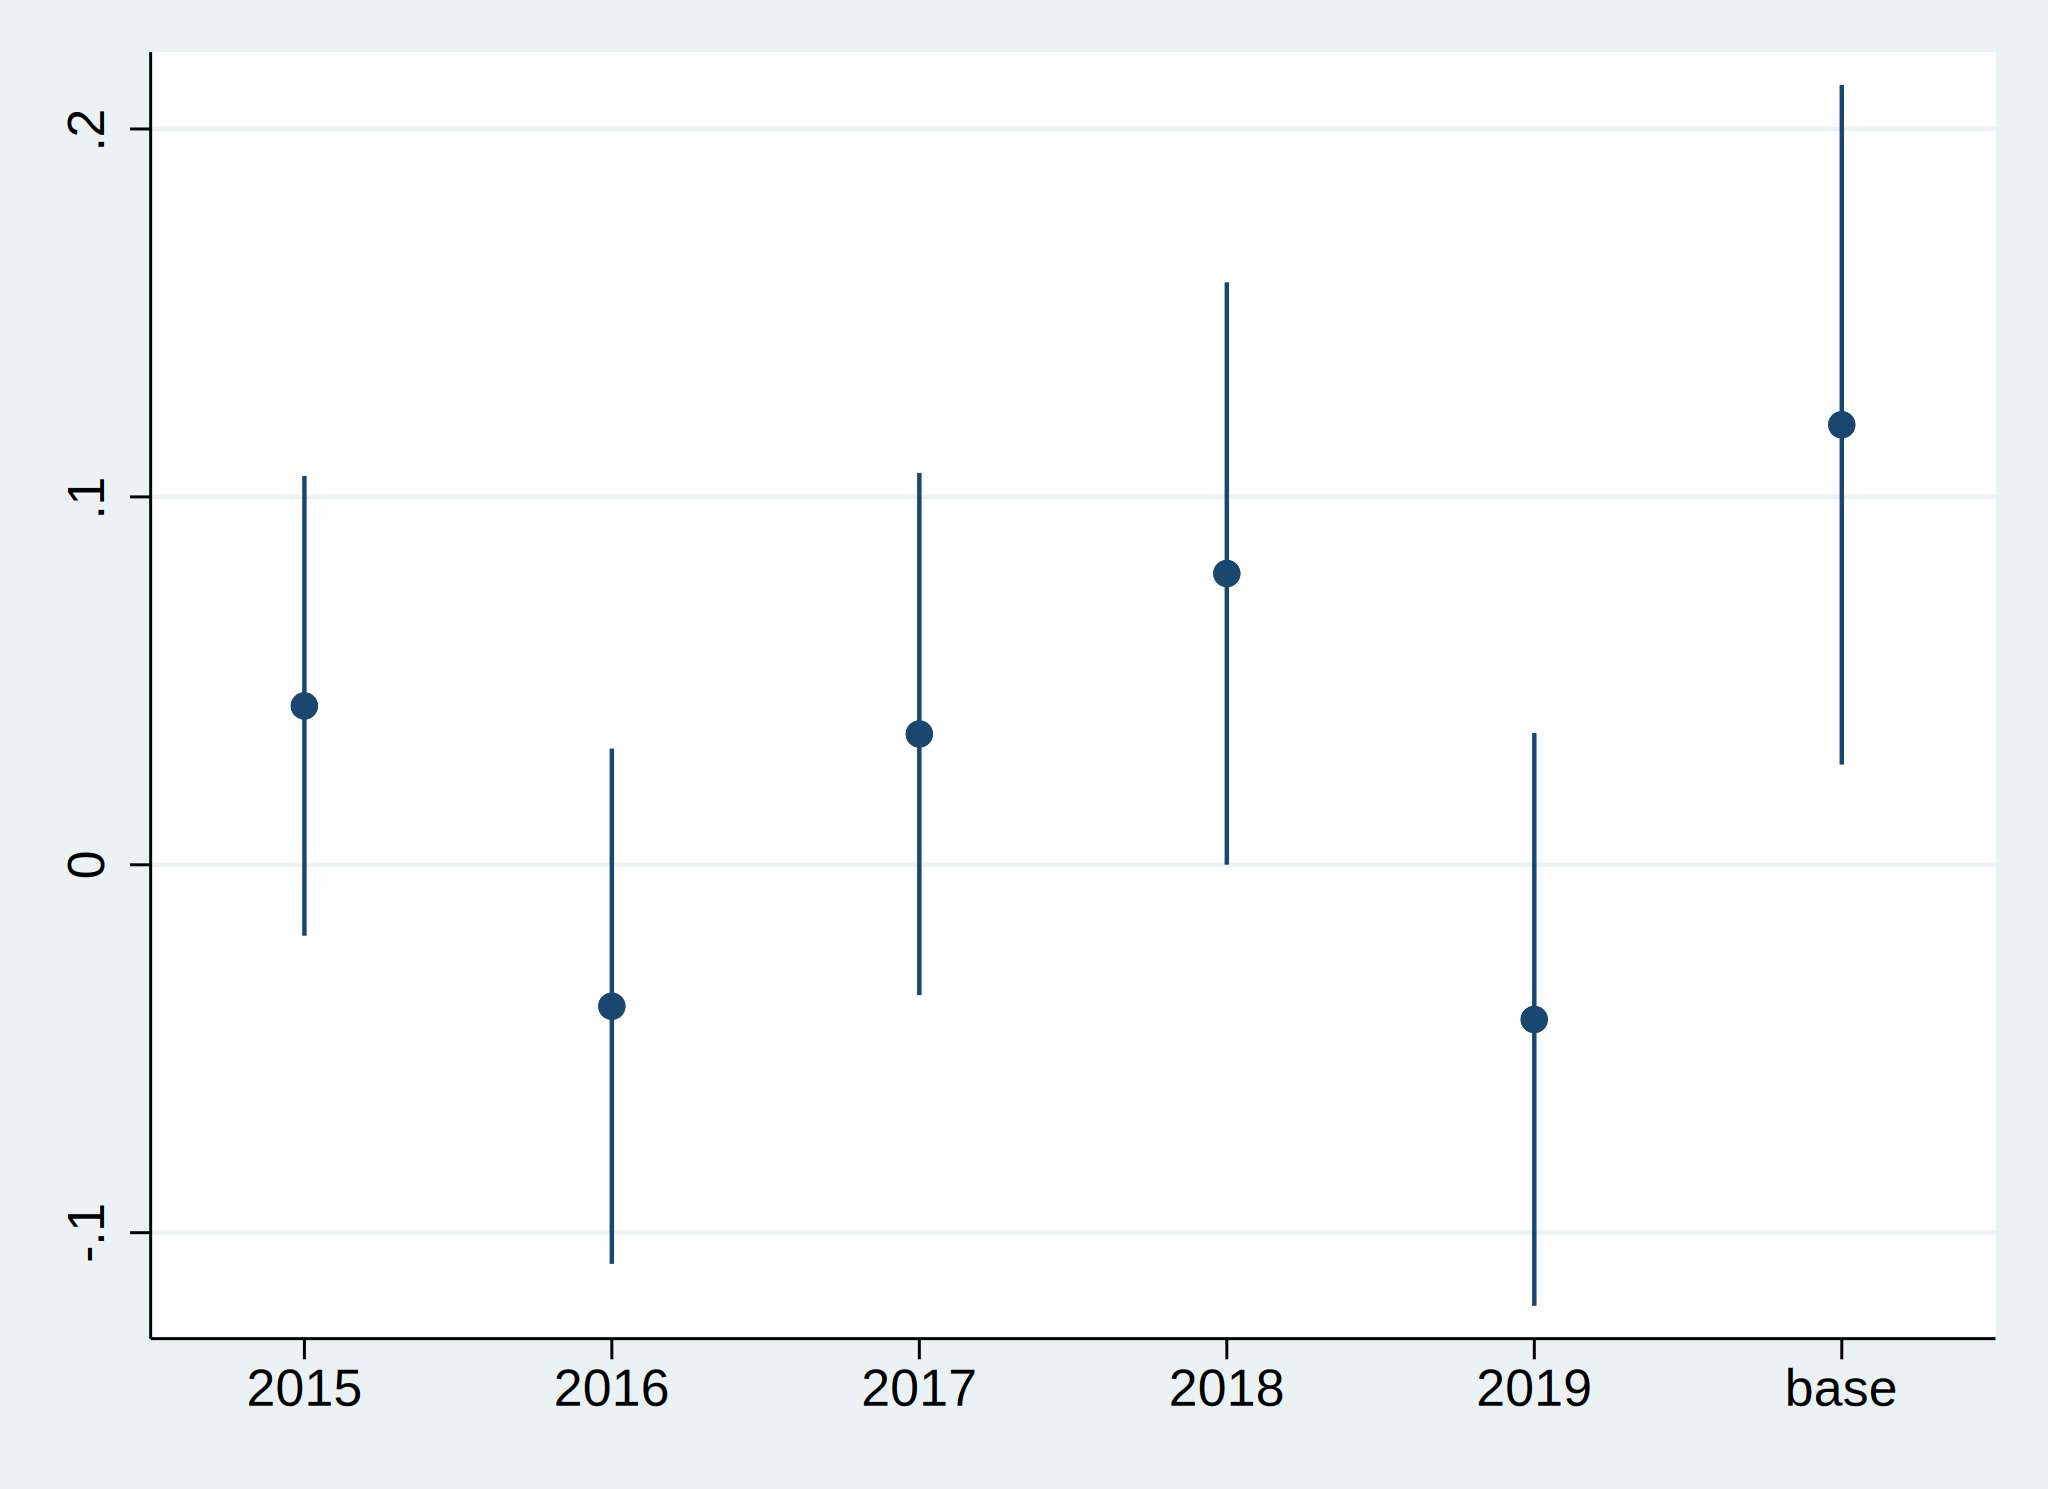

In [9]:
%%stata
qui{
capture restore    
use temp,clear
preserve
use ../data/suicide_analysis_data,clear


collapse (sum) suicide_f_u20 (first) prefecture cityname,by(citycode year)
rename suicide_f_u20 suicide_f_u20_
reshape wide suicide_f_u20, i(citycode)  j(year)
save suicide_f_u20_past,replace
restore
merge m:1 citycode using suicide_f_u20_past,keepusing(suicide_f_u20_*)
drop _merge

gen suicide_f_u20_14_log=log(1+suicide_f_u20_2014)
gen suicide_f_u20_15_log=log(1+suicide_f_u20_2015)
gen suicide_f_u20_16_log=log(1+suicide_f_u20_2016)
gen suicide_f_u20_17_log=log(1+suicide_f_u20_2017)
gen suicide_f_u20_18_log=log(1+suicide_f_u20_2018)
gen suicide_f_u20_19_log=log(1+suicide_f_u20_2019)

gen D1_suicide_f_u20_log=suicide_f_u20_19_log-suicide_f_u20_18_log
gen D2_suicide_f_u20_log=suicide_f_u20_18_log-suicide_f_u20_17_log
gen D3_suicide_f_u20_log=suicide_f_u20_17_log-suicide_f_u20_16_log
gen D4_suicide_f_u20_log=suicide_f_u20_16_log-suicide_f_u20_15_log
gen D5_suicide_f_u20_log=suicide_f_u20_15_log-suicide_f_u20_14_log

    
local clsvars="citycode"
xtset citycode covid
reghdfe  D.suicide_f_u20_log commuter_ratio_m , cluster(`clsvars') noabsorb
nlcom `paracomp_f_reduced', post                                                        
                                                      
keep if covid==1

reghdfe  D1_suicide_f_u20_log commuter_ratio_m, cluster(`clsvars') noabsorb
nlcom `paracomp_f_reduced', post
est store suicide_f_reduced1
reghdfe  D2_suicide_f_u20_log commuter_ratio_m, cluster(`clsvars') noabsorb
nlcom `paracomp_f_reduced', post
est store suicide_f_reduced2
reghdfe  D3_suicide_f_u20_log commuter_ratio_m, cluster(`clsvars') noabsorb
nlcom `paracomp_f_reduced', post
est store suicide_f_reduced3
reghdfe  D4_suicide_f_u20_log commuter_ratio_m, cluster(`clsvars') noabsorb
nlcom `paracomp_f_reduced', post
est store suicide_f_reduced4
reghdfe  D5_suicide_f_u20_log commuter_ratio_m, cluster(`clsvars') noabsorb
nlcom `paracomp_f_reduced', post
est store suicide_f_reduced5
                                                        
coefplot suicide_f_reduced5 ,bylabel(2015)|| suicide_f_reduced4 ,bylabel(2016) || suicide_f_reduced3  ,bylabel(2017)  || suicide_f_reduced2  ,bylabel(2018)  || suicide_f_reduced1  ,bylabel(2019)  || suicide_f_reduced0 ,bylabel(base) bycoefs  drop(_cons) xline(0) vertical  name(pre_test,replace) saving(pre_test,replace)
                                                        

}
